# Forecasting

In [5]:
# Imports
%matplotlib notebook

import sys
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from graphviz import Digraph
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

---
### Exponential Smoothing

$$
\begin{aligned}
F_t &= F_{t-1} + \alpha \underbrace{\Big(A_{t-1} - F_{t-1}\Big)}_{\text{Error}}
\end{aligned}
$$

In [9]:
t_shirt_demand = pd.DataFrame(
    np.array([
        [910, 1185],
        [617, 1470],
        [1073, 1229],
        [1383, 1249],
        [1360, 1338],
        [1520, 1108],
        [345, 1610],
        [930, 1520],
        [1329, 1212],
        [674, 1800]
    ]),
    columns=['Red Shirts', 'Blue Shirts']
)

t_shirt_demand.head()

,Red Shirts,Blue Shirts
0,910,1185
1,617,1470
2,1073,1229
3,1383,1249
4,1360,1338


<IPython.core.display.Javascript object>


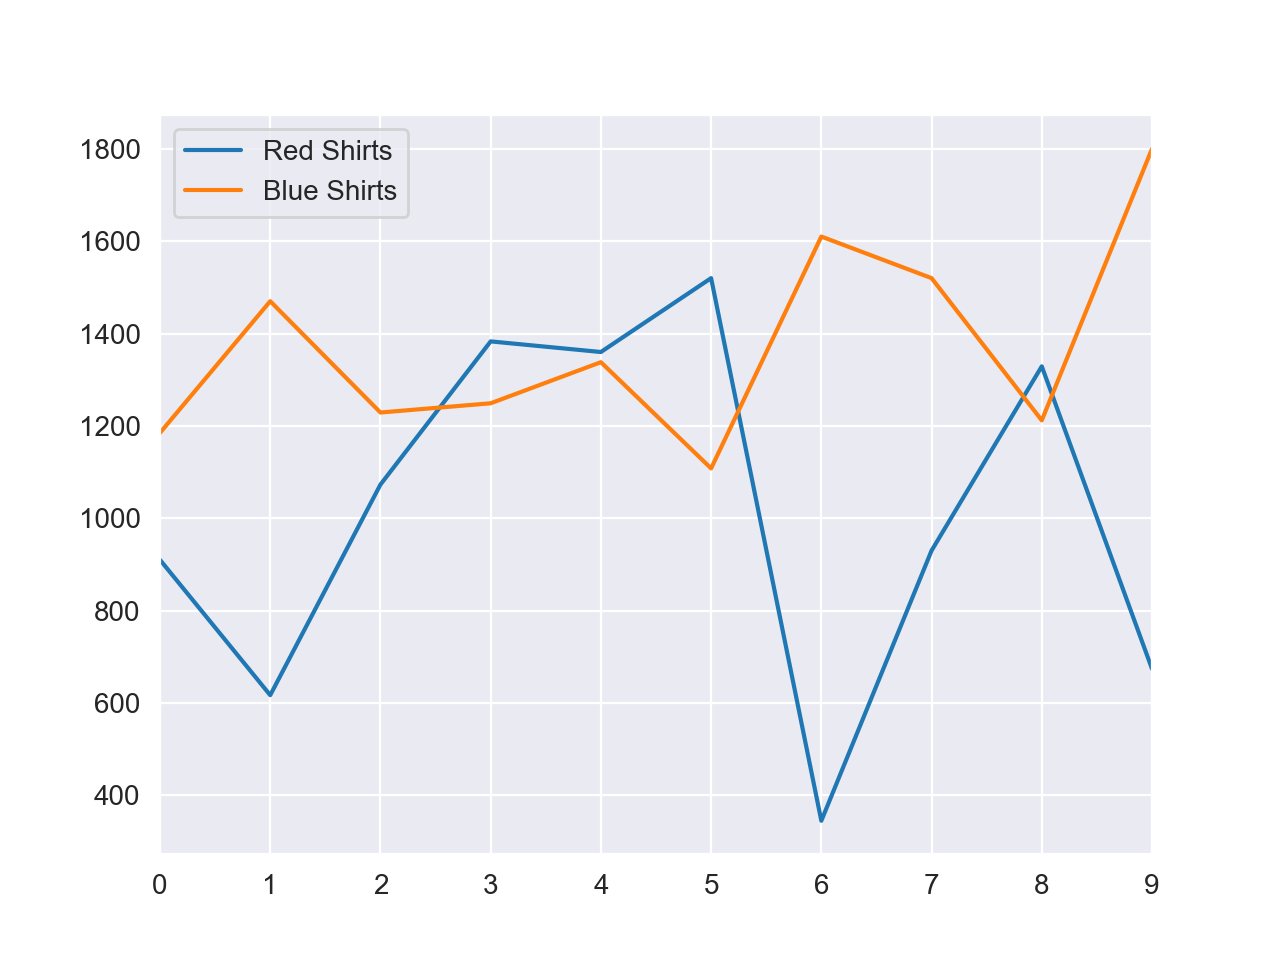

In [11]:
t_shirt_demand.plot()

plt.show();

In [96]:
def get_exp_smooth_pred(cols, alpha=0.3):
    """Gets the exponential smoothing prediction for next
    timestep
    - Holding separate inventories of Red and Blue shirts along
        with associated safety stocks is more expensive than holding
        consolidated /aggregate inventory of “generic” shirts (along
        with aggregate safety stock
    - Therefore makes sense to have a stock of “generic” shirts that
        are then dyed red or blue based on customer orders
    - This is known as Postponement
    
    Args:
        cols (list): List of column names to calculate prediction
        alpha (float): The alpha value to be used for exponential smoothing
        
    Returns:
        scalar of the next timestep prediction
    """
    forecast = t_shirt_demand[cols]\
        .ewm(alpha=alpha, adjust=False).mean()

    mad = abs(t_shirt_demand[cols][1:].sum(axis=1) \
              - forecast.shift(1)[1:].sum(axis=1)).mean()
    
    safety_stock = scipy.stats.norm.ppf(0.975) * 1.25 * mad

    return np.sum(forecast.iloc[-1]) + safety_stock

In [97]:
get_exp_smooth_pred(cols=['Red Shirts'])

1893.5688551695885

In [98]:
get_exp_smooth_pred(cols=['Blue Shirts'])

1966.4385707456572

In [99]:
get_exp_smooth_pred(cols=['Red Shirts', 'Blue Shirts'])

3030.2716740637843